In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

1. Изучите набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

class - Классовый идентификатор

Alcohol - Содержание алкоголя

Malic acid - Содержание яблочной кислоты

Ash - Зольность

Alcalinity of ash - Содержание щелочи

Magnesium - Содержание магния Total phenols - Всего фенолов

Flavanoids - Флавоноиды

Nonflavanoid phenols - Нефлаваноидные фенолы

Proanthocyanins - Проантоцианидин

Color intensity - Интенсивность цвета

Hue - Оттенок

OD280/OD315 of diluted wines - Разбавленность вин

Proline - Сорт вина

In [12]:
wine = pd.read_csv("wine.data.txt", header = None)
wine.columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [7]:
print("Размер набора данных до удаления:", wine.shape)
wine = wine.drop_duplicates()
print("Размер набора данных после удаления:", wine.shape)

Размер набора данных до удаления: (178, 14)
Размер набора данных после удаления: (178, 14)


3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

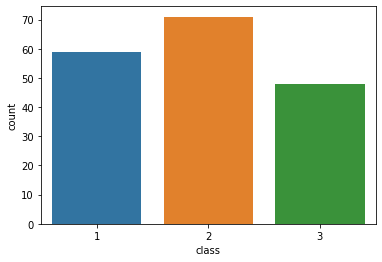

In [8]:
sns.countplot(data=wine, x='class')
plt.show()

4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

<AxesSubplot:>

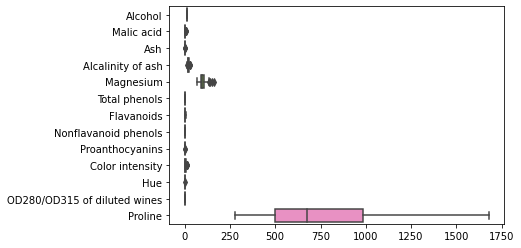

In [9]:
source = wine.drop('class', axis = 1)
sns.boxplot(data = source, orient = 'h')

<AxesSubplot:>

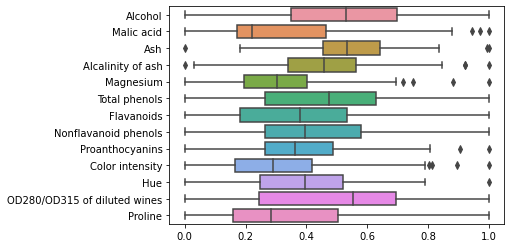

In [10]:
scale = MinMaxScaler()
columns = source.columns
source[columns] = scale.fit_transform(source[columns])
sns.boxplot(data = source, orient = 'h')

5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Категориальных признаков нет

6. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

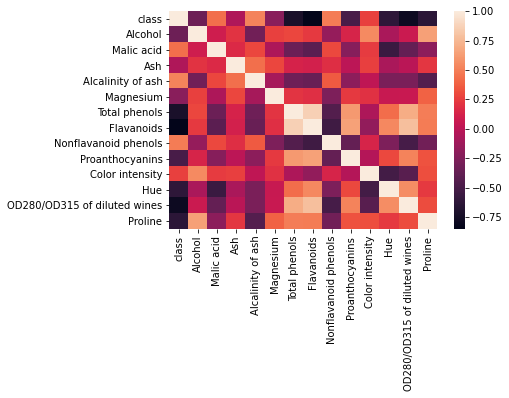

In [20]:
corr = wine.corr()
sns.heatmap(corr)

7. Заполните пропущенные значения в данных

In [46]:
wine.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

Пропущенных значений нет

8. Решите поставленную задачу классификации в соответствии с заданием. При подборе
параметров классификатора используйте метод GridSearchCV и перекрёстную проверку
(изучите возможные для изменения параметры классификации). Оцените качество работы классификатора.

1 – классификатор K ближайших соседей (задаётся количество ближайших объектов)

4 – логический классификатор (бинарное решающее дерево)

In [48]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
import warnings
warnings.simplefilter('ignore')

In [22]:
from sklearn.model_selection import train_test_split
y = wine ['class']
x = wine [['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']]
x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.33, random_state=0)
print('Training ', x_test.shape)
print('Test ', x_test.shape)

Training  (59, 13)
Test  (59, 13)


Классификатор K ближайших соседей (задаётся количество ближайших объектов)

In [28]:
knn = KNeighborsClassifier()

search = GridSearchCV(knn, {'n_neighbors': [x for x in range(1, 50)]})
search.fit(x_train, y_train)

n = search.best_estimator_.n_neighbors
best = search.best_score_

Метод GridSearchCV

In [29]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
print("Значение точности:", accuracy_score(y_test, knn_predict))
print('Лучшая точность:', best)

Значение точности: 0.7288135593220338
Лучшая точность: 0.7228260869565217


Перекрестный метод

In [58]:
all_accuracies = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)
print('Точность для cv=10:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=10: [0.75       0.58333333 0.33333333 0.75       0.75       0.91666667
 0.75       0.75       0.58333333 0.81818182]
Среднее значение точности: 0.6984848484848485


Логический классификатор (бинарное решающее дерево)

In [44]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 5, random_state = 1)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)
print('Оценка точности: %.5f' % accuracy_score(y_test, y_pred))

Оценка точности: 0.89831


Метод GridSearchCV

In [49]:
tree1 = {'max_depth': range(1,11), 'max_features': range(4,19), 'criterion': ('gini', 'entropy')}
tree2 = GridSearchCV(tree, tree1, cv=5, n_jobs=-1, verbose=True)
tree2.fit(x_train, y_train)
print('Лучший набор:', tree2.best_params_)
print('Лучшая точность:', tree2.best_score_)
print('Значение точности: %.5f' % accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Лучший набор: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4}
Лучшая точность: 0.9159420289855073
Значение точности: 0.89831


Перекрестный метод

In [47]:
all_accuracies = cross_val_score(estimator=tree, X=x_train, y=y_train, cv=5)
print('Точность для cv=5:', all_accuracies)
print('Среднее значение точности:', all_accuracies.mean())

Точность для cv=5: [0.91666667 0.95833333 0.95833333 0.875      0.86956522]
Среднее значение точности: 0.9155797101449276
